In [22]:
import pandas as pd
from transformers import pipeline
import torch
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("propaganda_results.csv")

prop_df = df[(df["is_propaganda"] == True) & (df["prop_score"] > 0.9)].copy()

In [11]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

technique_classifier = pipeline(
    "text-classification",
    model="synapti/nci-technique-classifier-v2",
    device=device
)

def classify_technique(sentence):
    try:
        result = technique_classifier(sentence)
        if isinstance(result, list) and len(result) > 0:
            return result[0]["label"]
        else:
            return None
    except Exception as e:
        print(f"Error in: {sentence}\n{e}")
        return None

prop_df["technique"] = prop_df["sentence"].apply(classify_technique)

most_common_technique_per_year = (
    prop_df.groupby("year")["technique"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

print(most_common_technique_per_year)

Device set to use mps


    year                 technique
0   1999  Appeal_to_fear-prejudice
1   2000     Name_Calling,Labeling
2   2001     Name_Calling,Labeling
3   2002     Name_Calling,Labeling
4   2003     Name_Calling,Labeling
5   2004     Name_Calling,Labeling
6   2005     Name_Calling,Labeling
7   2006     Name_Calling,Labeling
8   2007     Name_Calling,Labeling
9   2008     Name_Calling,Labeling
10  2009     Name_Calling,Labeling
11  2012     Name_Calling,Labeling
12  2013     Name_Calling,Labeling
13  2014     Name_Calling,Labeling
14  2015     Name_Calling,Labeling
15  2016     Name_Calling,Labeling
16  2017     Name_Calling,Labeling
17  2018     Name_Calling,Labeling
18  2019     Name_Calling,Labeling
19  2020     Name_Calling,Labeling
20  2021     Name_Calling,Labeling
21  2022     Name_Calling,Labeling
22  2023     Name_Calling,Labeling
23  2024     Name_Calling,Labeling


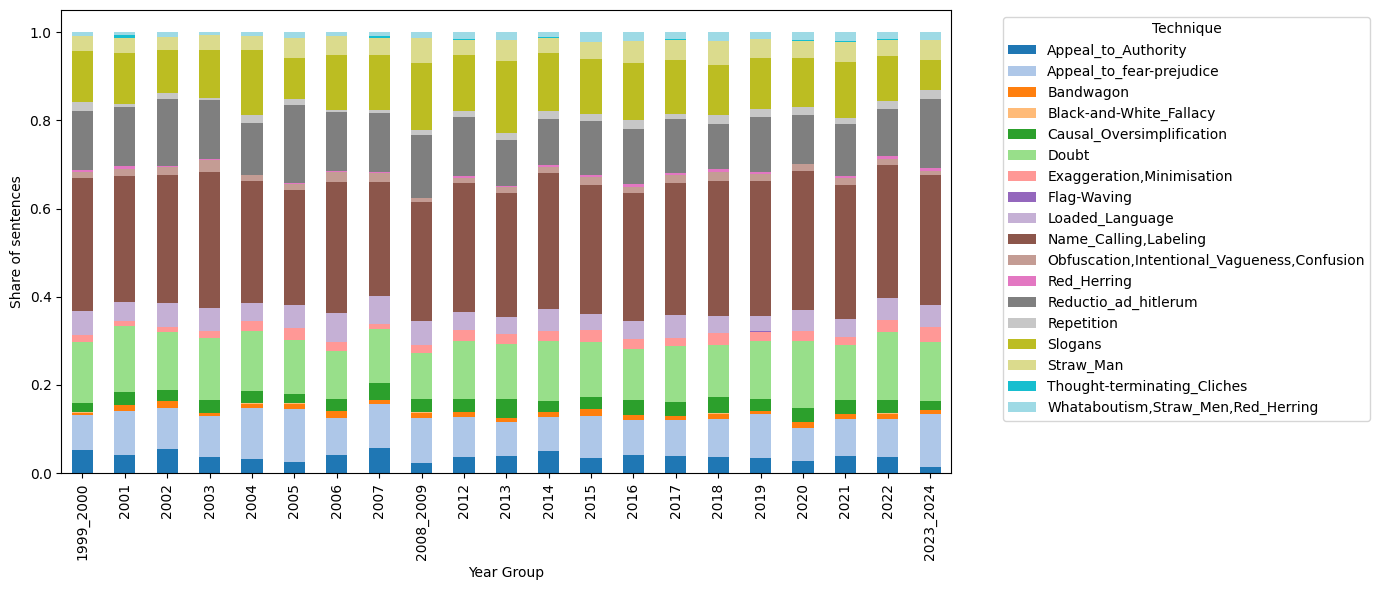

In [23]:
def map_year_group(year):
    if year in [1999, 2000]:
        return "1999_2000"
    elif year in [2008, 2009]:
        return "2008_2009"
    elif year in [2023, 2024]:
        return "2023_2024"
    else:
        return str(year)

prop_df["year_group"] = prop_df["year"].apply(map_year_group)

tech_counts = prop_df.groupby(["year_group","technique"]).size().unstack(fill_value=0)

tech_counts_pct = tech_counts.divide(tech_counts.sum(axis=1), axis=0)

tech_counts_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(14,6),
    colormap='tab20'
)
plt.ylabel("Share of sentences")
plt.xlabel("Year Group")
plt.legend(title="Technique", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()